In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


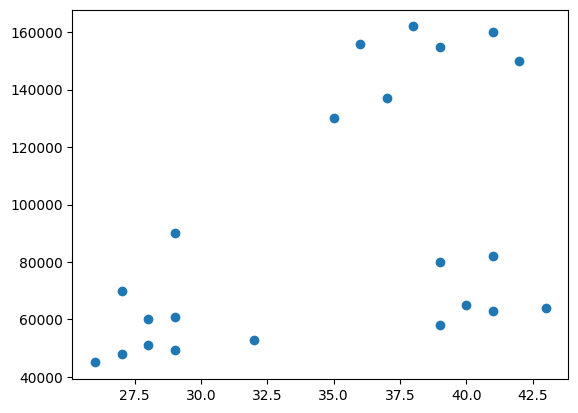

In [8]:
plt.scatter( df['Age'] , df['Income($)']  )

In [9]:
from sklearn.cluster import KMeans

## Min Max Scaler

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


In [14]:
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
df.head()

,Name,Age,Income($)
0,Rob,27,0.213675
1,Michael,29,0.384615
2,Mohan,29,0.136752
3,Ismail,28,0.128205
4,Kory,42,0.897436


In [15]:
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


In [18]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict( df[['Age' , 'Income($)']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [19]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [22]:
df0 = df[ df.cluster == 0]
df0

,Name,Age,Income($),cluster
16,Dipika,0.823529,0.170940,0
17,Priyanka,0.882353,0.153846,0
18,Nick,1.000000,0.162393,0
19,Alia,0.764706,0.299145,0
20,Sid,0.882353,0.316239,0
21,Abdul,0.764706,0.111111,0


In [27]:
df1 = df[ df.cluster == 1]
df2 = df[ df.cluster == 2]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


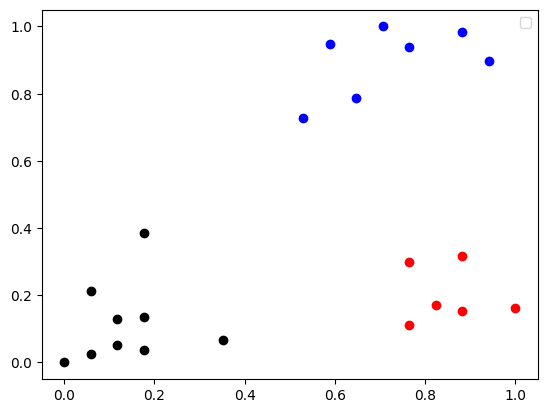

In [29]:
plt.scatter(df0.Age , df0['Income($)'] , color="red" )
plt.scatter(df1.Age , df1['Income($)'] , color="black" )
plt.scatter(df2.Age , df2['Income($)'] , color="blue" )
plt.legend()

In [30]:
centers = km.cluster_centers_
centers

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


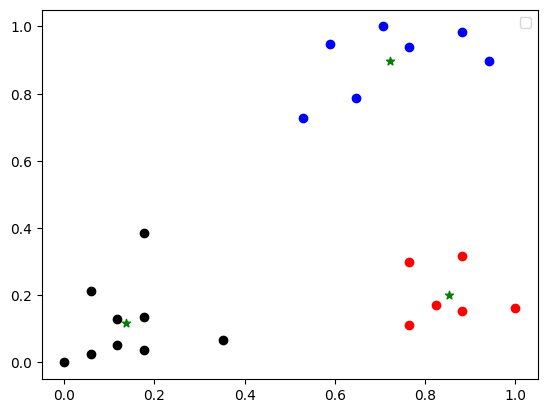

In [31]:
plt.scatter(df0.Age , df0['Income($)'] , color="red" )
plt.scatter(df1.Age , df1['Income($)'] , color="black" )
plt.scatter(df2.Age , df2['Income($)'] , color="blue" )
plt.scatter( centers[:, 0] , centers[:, 1] , color="green" , marker='*')
plt.legend()

## Elbow Technique

In [32]:
k_rang = range(1,10)
sse = []
for k in k_rang:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age' , 'Income($)']])
    sse.append(km.inertia_)

Text(0, 0.5, 'Sum of Square Error')

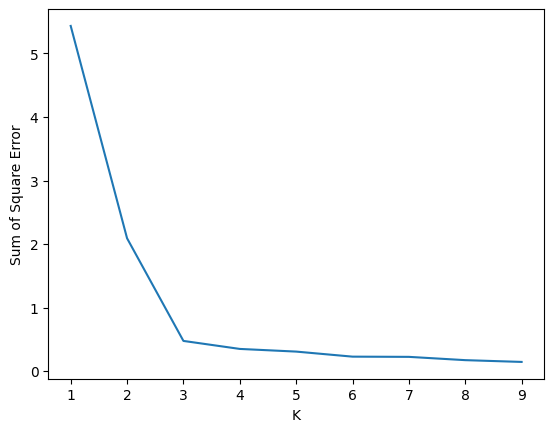

In [34]:
plt.plot( k_rang , sse)
plt.xlabel('K')
plt.ylabel('Sum of Square Error')

# elbow found at 3 